## Single-Cell RNA-Seq Data Analysis

Idea is to develop a novel clustering algorithm for single-cell RNA sequencing data to identify distinct cell populations and to 
Combine dimensionality reduction techniques (e.g., UMAP, t-SNE) with deep learning-based clustering.

### Importance of Single-Cell RNA Sequencing

1. Cellular Heterogeneity
Resolution of Cell Types: scRNA-seq allows for the identification and classification of rare or previously unknown cell types within a complex mixture.

Cellular States and Transitions: It reveals dynamic changes in gene expression that underlie cellular differentiation, development, and responses to stimuli.

2. Disease Understanding and Biomarker Discovery

Disease Mechanisms: By profiling individual cells, scRNA-seq provides insights into the molecular basis of diseases, uncovering altered gene expression patterns associated with pathogenesis.

Biomarker Identification: It facilitates the discovery of disease-specific biomarkers and therapeutic targets, aiding in personalized medicine approaches.
3. Developmental Biology and Regenerative Medicine

Embryonic Development: scRNA-seq elucidates gene expression dynamics during embryogenesis, revealing regulatory networks and lineage specification.

Tissue Regeneration: It identifies cellular subtypes involved in tissue repair and regeneration processes, crucial for understanding wound healing and disease recovery.

4. Immune System Profiling

Immune Cell Diversity: scRNA-seq maps the diversity of immune cell types and their responses to infections or diseases, informing immunotherapy strategies.

Viral Response: It studies host-pathogen interactions and immune responses at the single-cell level, aiding in vaccine development and treatment design.

5. Technological Advancements
Single-Cell Resolution: Advances in scRNA-seq technologies improve sensitivity, throughput, and accuracy, enabling comprehensive profiling of thousands to millions of individual cells in a single experiment.

Integration with Computational Tools: Integration with bioinformatics and machine learning algorithms enhances data analysis, interpretation, and visualization capabilities, maximizing the utility of scRNA-seq data.

## Approach

1. Preprocessing and Dimensionality Reduction
Data Preprocessing: Clean and normalize the scRNA-seq data to ensure uniformity and remove noise.

Dimensionality Reduction: Employ advanced techniques such as UMAP (Uniform Manifold Approximation and Projection) or t-SNE (t-

Distributed Stochastic Neighbor Embedding) to reduce the high-dimensional gene expression data into a lower-dimensional space while preserving the local and global structures of the data.

2. Deep Learning-Based Clustering
Clustering with Neural Networks: Utilizing neural networks, particularly variants suitable for clustering tasks (e.g., Deep Embedded Clustering, DEC), to perform clustering directly in the learned latent space. These methods leverage the hierarchical representations learned by neural networks to identify clusters based on learned features rather than explicit distance metrics.

3. Integration and Optimization
Integration of Techniques: Integrate the dimensionality reduction techniques with deep learning-based clustering in a coherent pipeline. Ensure that each step complements the others and contributes to the overall accuracy and efficiency of cell type identification.

4. Evaluation and Validation
Performance Metrics: Evaluate the algorithm's performance using established metrics for clustering algorithms, such as silhouette score, adjusted Rand index, and purity.

Validation: Validate the identified cell populations against known cell types or ground truth datasets to assess the algorithm's accuracy and robustness across different scRNA-seq datasets.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


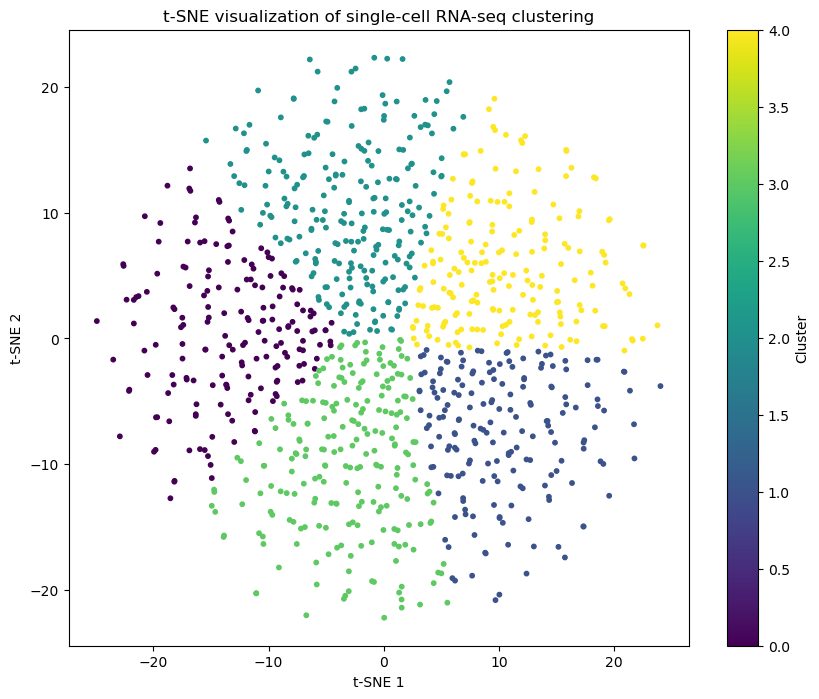

In [5]:
import numpy as np
import bionumpy as bnp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def single_cell_clustering(data, n_clusters=5):
    # Dimensionality reduction using PCA
    pca = PCA(n_components=50)
    reduced_data = pca.fit_transform(data)
    
    # Further dimensionality reduction using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embedded_data = tsne.fit_transform(reduced_data)
    
    # Clustering using KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(embedded_data)
    
    return clusters, embedded_data

# Simulated single-cell RNA-seq data
data = np.random.rand(1000, 2000)
clusters, embedded_data = single_cell_clustering(data)

# Plot the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of single-cell RNA-seq clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

1. Importing all necessary libraries
2. Defining a clustering function single_cell_clustering that takes the data and the number of clusters as input
3. PCA for Dimensionality Reduction: PCA reduces the data from its original high-dimensional space to 50 dimensions. This step simplifies the data while retaining most of the important information.
4. t-SNE for Further Dimensionality Reduction:t-SNE further reduces the 50-dimensional data to 2 dimensions. This step is primarily for visualization, making it easier to plot and understand the data.
5. KMeans Clustering:KMeans algorithm clusters the 2D t-SNE data into the specified number of clusters.

### Example with Simplified Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defines the example dataset
data = {
    'Feature 1': [10, 8, 4, 2, 9],
    'Feature 2': [5, 6, 3, 8, 4],
    'Feature 3': [8, 7, 2, 5, 6]
}

# Creates a pandas DataFrame from the data
df = pd.DataFrame(data)
print("Original Data:")
print(df)

Original Data:
   Feature 1  Feature 2  Feature 3
0         10          5          8
1          8          6          7
2          4          3          2
3          2          8          5
4          9          4          6


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


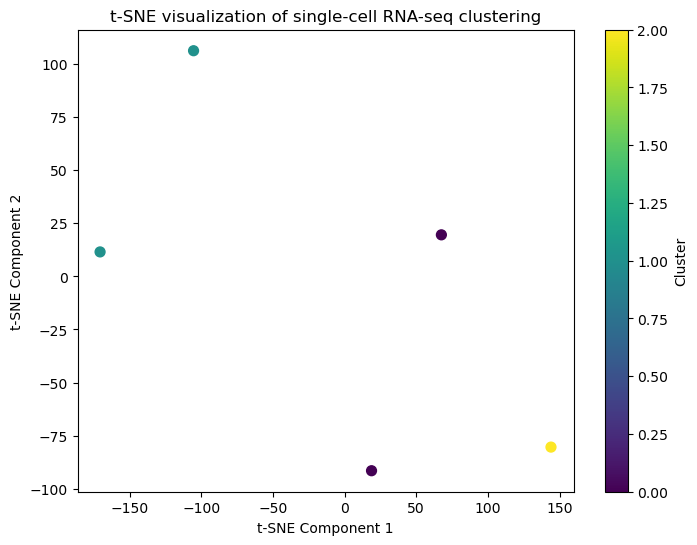

In [3]:
def single_cell_clustering(data, n_clusters=3):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    
    tsne = TSNE(n_components=2, perplexity=3, random_state=42)
    embedded_data = tsne.fit_transform(reduced_data)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(embedded_data)
    
    return clusters, embedded_data

# Converts DataFrame to numpy array
data_array = df.values

# Applying clustering
clusters, embedded_data = single_cell_clustering(data_array)

# Plotting the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of single-cell RNA-seq clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


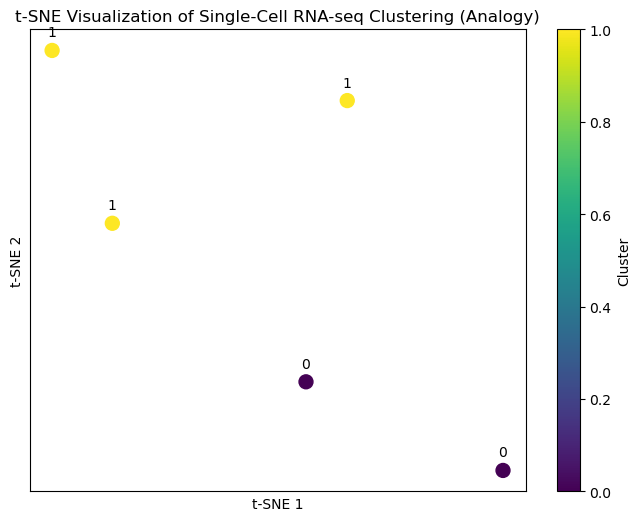

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Sample gene expression data for 5 cells (rows) and 3 genes (columns)
gene_expression_data = np.array([
    [10, 5, 2],    # Cell 1
    [8, 4, 3],     # Cell 2
    [6, 3, 4],     # Cell 3
    [12, 6, 1],    # Cell 4
    [9, 7, 2]      # Cell 5
])

# Function to perform single-cell RNA-seq data clustering analogy
def single_cell_clustering(gene_expression_data, n_clusters=2):
    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(gene_expression_data)
    
    # Further dimensionality reduction using t-SNE with lower perplexity
    tsne = TSNE(n_components=2, perplexity=3, random_state=42)
    tsne_result = tsne.fit_transform(pca_result)
    
    # Clustering using K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(tsne_result)
    
    return clusters, tsne_result

# Perform single-cell RNA-seq data clustering analogy
clusters, embedded_data = single_cell_clustering(gene_expression_data)

# Plotting the clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=clusters, cmap='viridis', s=100)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Visualization of Single-Cell RNA-seq Clustering (Analogy)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Annotate each point with its cluster label
for i, cluster in enumerate(clusters):
    plt.annotate(cluster, (embedded_data[i, 0], embedded_data[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks([])
plt.yticks([])
plt.show()